## Machine  learning  do banco de dados  do pinguim do Arquipélago Palmer (Antártica)

O objetivo do estudo é predizer o sexo do pinguim em relação a sua estatura quando adulto ultilizando o  modelo de aprendizado supervisionado. O banco de dados apresenta as seguintes variáveis:
- species: espécies de pinguins (Barbicha, Adélie ou Gentoo);
- culmen_length_mm: comprimento do cúlmen (mm);
- culmen_depth_mm: profundidade do cúlmen (mm);
- flipper_length_mm: comprimento da palheta (mm);
- body_mass_g: massa corporal (g);
- island: nome da ilha (Dream, Torgersen ou Biscoe) no Arquipélago Palmer (Antártica);
- sex: sexo do pinguim (MALE E FAMALE).



### Análisando o banco de dados


In [1]:
# Pacotes necessários 
import pandas as pd 
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt2 
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Entrando com o dataset
df = pd.read_csv("C:/Users/rayza/OneDrive/Área de Trabalho/Topicos/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Informações do dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# Análise descritiva 
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [5]:
# Quantidade de observação e variáveis 
print(df.shape)

(344, 7)


### Tratamento do banco de dados

In [6]:
# Verificando dados ausentes 
df.isnull()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [7]:
# Soma de cada dados ausentes em cada coluna 
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

 #### Codificando valores de strings para  númericas para as colunas "island" e "sex", de modo que, Biscoe = 0, Torgersen = 1 e Dream = 2 e MALE= 0 e FEMALE = 1

In [8]:
#Tranformando island(ilha) em númerica 
df.loc[df["island"] == "Biscoe", "island"] = 0
df.loc[df["island"] == "Torgersen", "island"] = 1
df.loc[df["island"] == "Dream", "island"] = 2
df["island"] = df["island"].astype(float)

#Tranformando sex(sexo) em númerica 
df.loc[df["sex"] == "MALE", "sex"] = 0
df.loc[df["sex"] == "FEMALE", "sex"] = 1
df.loc[df["sex"] == "NA", "sex"] = None
df.loc[df["sex"] == ".", "sex"] = None
df["sex"] = df["sex"].astype(float)

### Critério de removação dos ausentes.

In [9]:

def missing_values_table(df):
        # Valores totais ausentes
        mis_val = df.isnull().sum()
        
        # Porcentagem de valores ausentes
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Fazendo  uma tabela com os resultados
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Renomando as colunas
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Classifique a tabela por porcentagem de descendentes ausentes
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Imprima algumas informações resumidas
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Retorne o dataframe com informações ausentes
        return mis_val_table_ren_columns

In [10]:
# Verificando as porcentagens dos valores ausentes de cada variável.
missing= missing_values_table(df)
missing

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,11,3.2
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


###  Preenchendo os valores ausentes pela média ou mediana 

In [11]:
from sklearn.impute import SimpleImputer
# definindo a estratégia como 'mais frequente' para imputar pela média
imputer = SimpleImputer(strategy='most_frequent')# estratégia também pode ser média ou mediana 
df.iloc[:,:] = imputer.fit_transform(df)

In [12]:
# verificando as informações novamente.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    float64
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    float64
dtypes: float64(6), object(1)
memory usage: 18.9+ KB


In [13]:
# Verificando se tem dados ausentes 
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [14]:
# Categorizando a spercies 
categorical = (df.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print(categorical_list)

['species']


<AxesSubplot:>

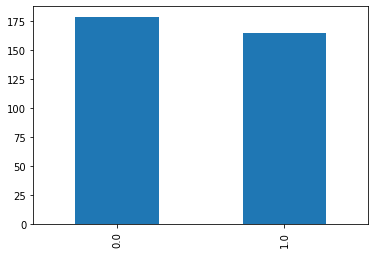

In [15]:
# Verificando a quantidade do sexo de cada species 
df['sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

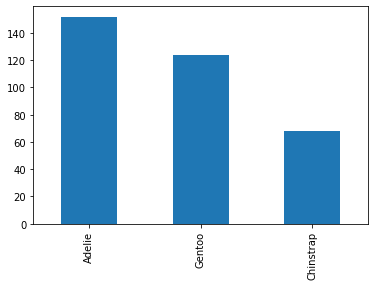

In [16]:
# Verificando a quantidade de cada species 
df['species'].value_counts().plot(kind='bar')

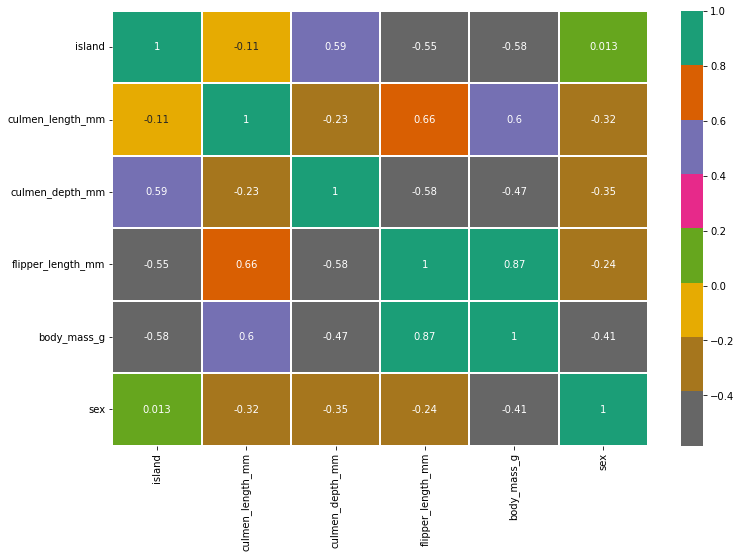

In [17]:
# Matrix de correlação 
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()


In [18]:
# Definindo dos float64 em númerico 
numerical_float64 = (df.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print(numerical_float64_list)

['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


In [19]:
# As 5 primeiras observações dos dados já tratados. 
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,1.0,39.1,18.7,181.0,3750.0,0.0
1,Adelie,1.0,39.5,17.4,186.0,3800.0,1.0
2,Adelie,1.0,40.3,18.0,195.0,3250.0,1.0
3,Adelie,1.0,41.1,17.0,190.0,3800.0,0.0
4,Adelie,1.0,36.7,19.3,193.0,3450.0,1.0


### Treinamento e Teste para os modelos 

In [20]:
# Definindo o x e y 
X = df.iloc[:,1:6].values 
y = df.iloc[:,6:].values


In [21]:
# Defindo o trainamendo 80 e 20 para o teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state = 42, shuffle = True ) 


In [22]:
# A forma do traindo e teste 
print(X_train.shape)
print(y_test.shape)
  

(275, 5)
(69, 1)


###  Modelo RandomForestClassifier

In [23]:

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators= 500, max_depth= 6)
forest.fit(X_train, y_train) #ajuste o randomforesta dos dados de treinamento
forest_preds = forest.predict(X_test)# fazer previsões fora dos dados de teste
forest.score(X_train, y_train)

0.9672727272727273

In [24]:
# Verificando a eficácia do modelo
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, forest_preds))


              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        39
         1.0       0.90      0.90      0.90        30

    accuracy                           0.91        69
   macro avg       0.91      0.91      0.91        69
weighted avg       0.91      0.91      0.91        69



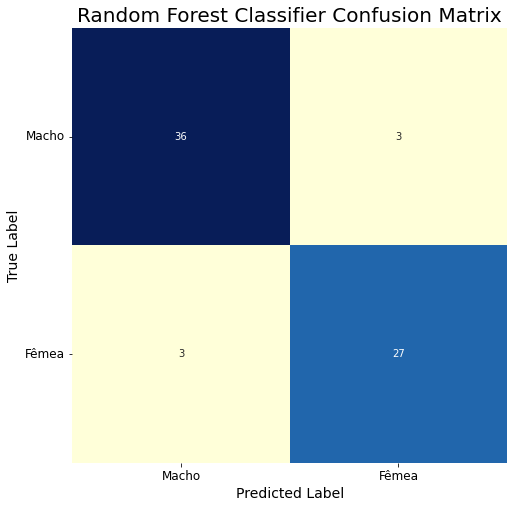

In [25]:
# Gráfico da matriz de confunsão
plt.figure(figsize=(8,8)) 

labels = ['Macho', 'Fêmea']

con_matrix = confusion_matrix(y_test, forest_preds)
sns.heatmap(con_matrix, cmap='YlGnBu', annot=True, cbar=False, square=True, 
           xticklabels=labels, 
           yticklabels=labels)

plt.yticks(rotation=0, fontsize=12)
plt.xticks(fontsize=12)

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Random Forest Classifier Confusion Matrix', fontsize=20)
plt.show()

### Modelo DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
Deci = DecisionTreeClassifier()
Deci = DecisionTreeClassifier(max_depth = 9, min_samples_split = 51)
Deci.fit(X_train, y_train)
y_pred = Deci.predict(X_test)
Deci.score(X_train, y_train)

0.8945454545454545

In [27]:
# Verificando a eficácia do modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87        39
         1.0       0.88      0.73      0.80        30

    accuracy                           0.84        69
   macro avg       0.85      0.83      0.83        69
weighted avg       0.85      0.84      0.84        69



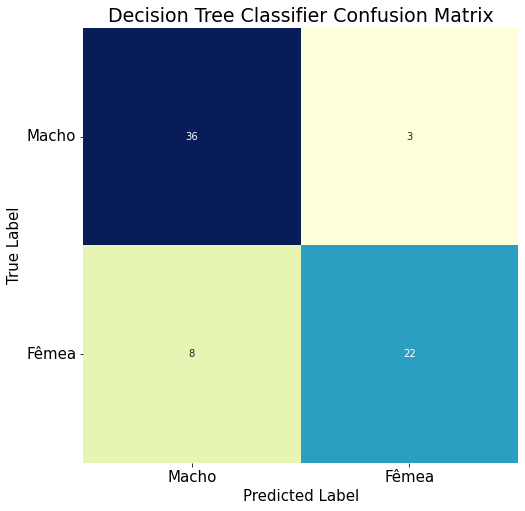

In [28]:
# Gráfico de matriz de confunsão 
plt.figure(figsize=(8,8)) 

labels = ['Macho', 'Fêmea']

con_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, cmap='YlGnBu', annot=True, cbar=False, square=True, 
           xticklabels=labels, 
           yticklabels=labels)

plt.yticks(rotation=0, fontsize=15)
plt.xticks(fontsize=15)

plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.title('Decision Tree Classifier Confusion Matrix', fontsize=19)
plt.show()

### Modelo Naive Bayes (GaussianNB)

In [29]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
gaussian.score(X_train, y_train)


0.7345454545454545

In [30]:
# Verificando a eficácia do modelo
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81        39
         1.0       0.74      0.83      0.78        30

    accuracy                           0.80        69
   macro avg       0.80      0.80      0.80        69
weighted avg       0.80      0.80      0.80        69



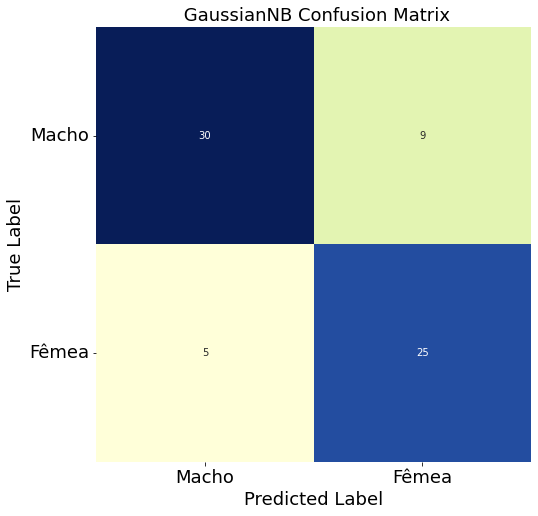

In [31]:
# Gráfico de matriz de confunsão 
plt.figure(figsize=(8,8)) 

labels = ['Macho', 'Fêmea']

con_matrix = confusion_matrix(y_test, Y_pred)
sns.heatmap(con_matrix, cmap='YlGnBu', annot=True, cbar=False, square=True, 
           xticklabels=labels, 
           yticklabels=labels)

plt.yticks(rotation=0, fontsize=18)
plt.xticks(fontsize=18)

plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.title(' GaussianNB Confusion Matrix', fontsize=18)
plt.show()

 ### Modelo  LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
reg_pred = logreg.predict(X_test)
logreg.score(X_train, y_train)

0.8036363636363636

In [33]:
# Verificando a eficácia do modelo 
print(classification_report(y_test, reg_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85        39
         1.0       0.82      0.77      0.79        30

    accuracy                           0.83        69
   macro avg       0.83      0.82      0.82        69
weighted avg       0.83      0.83      0.83        69



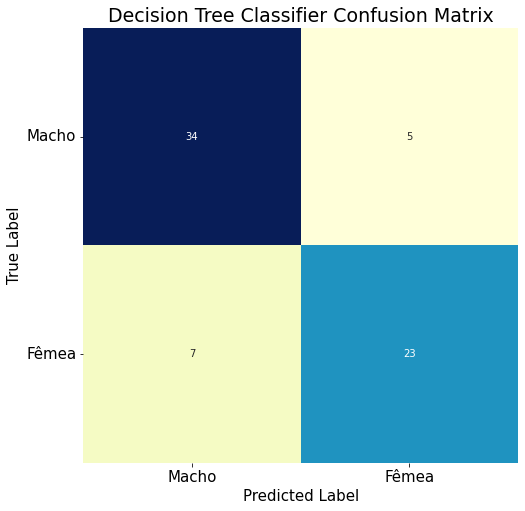

In [34]:
# Gráfico da matriz de confunsão 
plt.figure(figsize=(8,8)) 

labels = ['Macho', 'Fêmea']

con_matrix = confusion_matrix(y_test, reg_pred)
sns.heatmap(con_matrix, cmap='YlGnBu', annot=True, cbar=False, square=True, 
           xticklabels=labels, 
           yticklabels=labels)

plt.yticks(rotation=0, fontsize=15)
plt.xticks(fontsize=15)

plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.title('Decision Tree Classifier Confusion Matrix', fontsize=19)
plt.show()

### Cálculo do modelo da curva Roc

In [35]:
#Probabilidades de previsão
r_probs = [0 for _ in range(len(y_test))]
rf_probs = forest.predict_proba(X_test)
dt_probs = Deci.predict_proba(X_test)
nb_probs = gaussian.predict_proba(X_test)
rl_probs =logreg.predict_proba(X_test)

In [36]:
#As probabilidades para o resultado positivo são mantidas.
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
rl_probs = rl_probs[:, 1]
dt_probs = dt_probs[:, 1]


In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

In [38]:
#característica operacional do receptor AUROC é a área sob a curva ROC
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
rl_auc = roc_auc_score(y_test, rl_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

In [39]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('LogisticRegression: AUROC = %.3f' % (rl_auc))
print('DecisionTreeClassifier: AUROC = %.3f' % (dt_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.930
Naive Bayes: AUROC = 0.890
LogisticRegression: AUROC = 0.905
DecisionTreeClassifier: AUROC = 0.887


In [40]:
# Cálculo da curva ROC
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
rl_fpr, rl_tpr, _ = roc_curve(y_test, rl_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

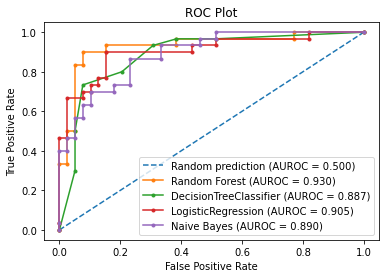

In [41]:
# Gráfico da curva Roc
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DecisionTreeClassifier (AUROC = %0.3f)' % dt_auc)
plt.plot(rl_fpr, rl_tpr, marker='.', label='LogisticRegression (AUROC = %0.3f)' % rl_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()


## 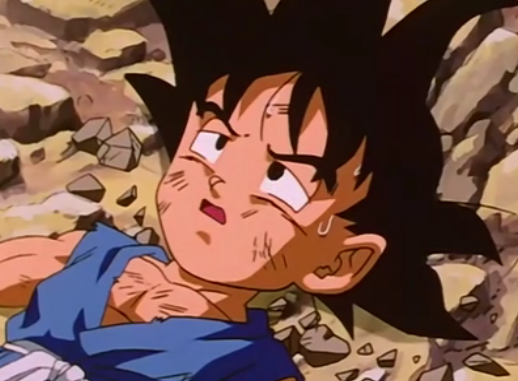 
